A partir des données de ce dataset nous voulons étudier la corrélation entre les différents paramètres et l'amplitude des séismes et nous voulons prédire l'amplitude d'un séisme en fonction de paramètres donnés

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('earthquakes.csv')
data.shape

(23412, 21)

In [2]:
data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [3]:
"""
Check column 100% NaN
"""
dropped_nan_col = []
for (columnName, columnData) in data.iteritems(): 
    if(data[columnName].isna().all() == True):
        dropped_nan_col.append(columnName)
print("{} feature have 100% NaN ".format(len(dropped_nan_col)))

0 feature have 100% NaN 


In [4]:
"""
Delete column more than 25% NaN
"""
def deal_nanp(df:pd.DataFrame, thresold: float):
    bf=[]
    for c in data.columns.to_list():
        if data[c].isna().sum()/data.shape[0] > thresold:
            bf.append(c)
    print("{} feature have more than {} NaN ".format(len(bf),thresold))
    print('\n\n - - - features - - -  \n {}'.format(bf))
    return bf
data = data.drop(deal_nanp(data, 0.25), axis=1)
data

8 feature have more than 0.25 NaN 


 - - - features - - -  
 ['Depth Error', 'Depth Seismic Stations', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square']


,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,MW,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,ML,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,ML,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,MWW,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,US10007NL0,US,US,US,Reviewed


In [5]:
import datetime
import time
timestamp = []
for d, t in zip(data['Date'], data['Time']):
    try:
        ts = datetime.datetime.strptime(d+' '+t, '%m/%d/%Y %H:%M:%S')
        timestamp.append(time.mktime(ts.timetuple()))
    except ValueError:
        timestamp.append('ValueError')
        
timeStamp = pd.Series(timestamp)
data['Timestamp'] = timeStamp.values

data = data.drop(['Date', 'Time'], axis=1)
data = data[data.Timestamp != 'ValueError']
data.head()

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status,Timestamp
0,19.246,145.616,Earthquake,131.6,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,-1.57631e+08
1,1.863,127.352,Earthquake,80.0,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,-1.57466e+08
2,-20.579,-173.972,Earthquake,20.0,6.2,MW,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,-1.57356e+08
3,-59.076,-23.557,Earthquake,15.0,5.8,MW,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,-1.57094e+08
4,11.938,126.427,Earthquake,15.0,5.8,MW,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,-1.57026e+08


In [6]:
"""
drop specific column
"""
def drop_specific_col():
    dropped_sepcific_col = []
    dropped_sepcific_col.append('ID')
    dropped_sepcific_col.append('Location Source')
    dropped_sepcific_col.append('Magnitude Source')
    dropped_sepcific_col.append('Magnitude Type')
    return dropped_sepcific_col

data = data.drop(drop_specific_col(), axis=1)
data

,Latitude,Longitude,Type,Depth,Magnitude,Source,Status,Timestamp
0,19.2460,145.6160,Earthquake,131.60,6.0,ISCGEM,Automatic,-1.57631e+08
1,1.8630,127.3520,Earthquake,80.00,5.8,ISCGEM,Automatic,-1.57466e+08
2,-20.5790,-173.9720,Earthquake,20.00,6.2,ISCGEM,Automatic,-1.57356e+08
3,-59.0760,-23.5570,Earthquake,15.00,5.8,ISCGEM,Automatic,-1.57094e+08
4,11.9380,126.4270,Earthquake,15.00,5.8,ISCGEM,Automatic,-1.57026e+08
...,...,...,...,...,...,...,...,...
23407,38.3917,-118.8941,Earthquake,12.30,5.6,NN,Reviewed,1.48291e+09
23408,38.3777,-118.8957,Earthquake,8.80,5.5,NN,Reviewed,1.48292e+09
23409,36.9179,140.4262,Earthquake,10.00,5.9,US,Reviewed,1.48293e+09
23410,-9.0283,118.6639,Earthquake,79.00,6.3,US,Reviewed,1.48305e+09


In [7]:
data.dtypes

Latitude     float64
Longitude    float64
Type          object
Depth        float64
Magnitude    float64
Source        object
Status        object
Timestamp     object
dtype: object

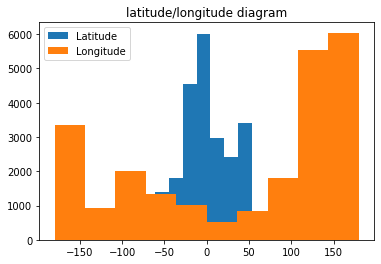

In [8]:
plt.hist(data["Latitude"], label='Latitude')
plt.hist(data["Longitude"], label='Longitude')
plt.title('latitude/longitude diagram')
plt.legend()
plt.show()

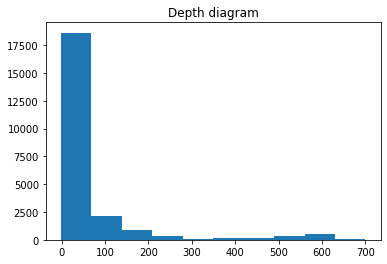

In [9]:
plt.hist(data["Depth"])
plt.title('Depth diagram')
plt.show()

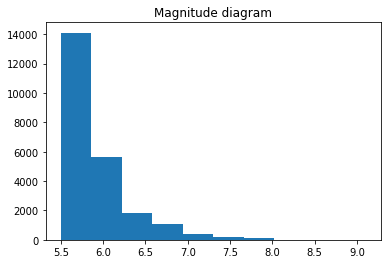

In [10]:
plt.hist(data["Magnitude"])
plt.title('Magnitude diagram')
plt.show()

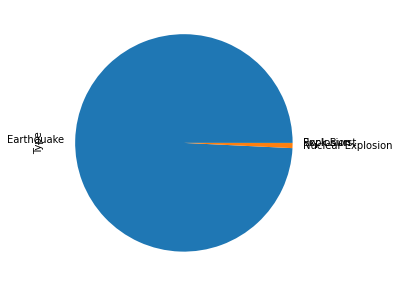

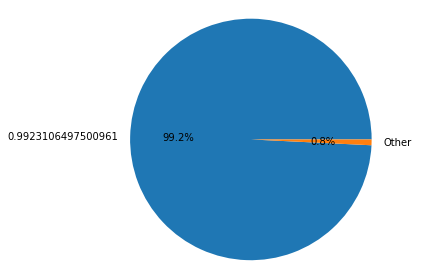

In [11]:
data["Type"].value_counts(normalize=True).plot(kind='pie', figsize=(5,5))
plt.show()

import itertools
newdic = {}
for key, group in itertools.groupby(data["Type"].value_counts(normalize=True), lambda k: 'Other' if (k<0.03) else k):
     newdic[key] = sum([k for k in list(group)])

labels = newdic.keys()
sizes = newdic.values()
    
fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
ax.axis('equal')
plt.tight_layout()

plt.show()

/home/lilian/venv/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  if sys.path[0] == '':


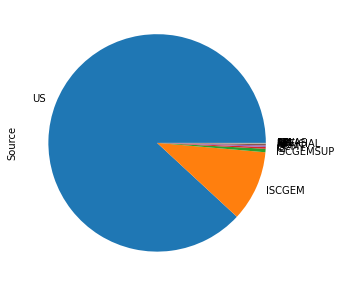

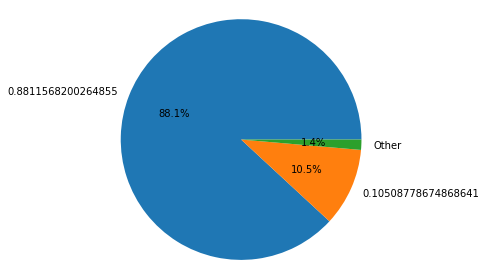

In [12]:
data["Source"].value_counts(normalize=True).plot(kind='pie', figsize=(5,5))

newdic = {}
for key, group in itertools.groupby(data["Source"].value_counts(normalize=True), lambda k: 'Other' if (k<0.03) else k):
     newdic[key] = sum([k for k in list(group)])

labels = newdic.keys()
sizes = newdic.values()
    
fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
ax.axis('equal')
plt.tight_layout()

plt.show()

<AxesSubplot:ylabel='Status'>

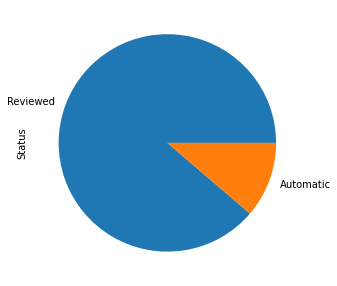

In [13]:
data["Status"].value_counts(normalize=True).plot(kind='pie', figsize=(5,5))

In [14]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(data['Type'])
data['Type'] = le.transform(data['Type'])

le.fit(data['Source'])
data['Source'] = le.transform(data['Source'])

le.fit(data['Status'])
data['Status'] = le.transform(data['Status'])
data

,Latitude,Longitude,Type,Depth,Magnitude,Source,Status,Timestamp
0,19.2460,145.6160,0,131.60,6.0,4,0,-1.57631e+08
1,1.8630,127.3520,0,80.00,5.8,4,0,-1.57466e+08
2,-20.5790,-173.9720,0,20.00,6.2,4,0,-1.57356e+08
3,-59.0760,-23.5570,0,15.00,5.8,4,0,-1.57094e+08
4,11.9380,126.4270,0,15.00,5.8,4,0,-1.57026e+08
...,...,...,...,...,...,...,...,...
23407,38.3917,-118.8941,0,12.30,5.6,7,1,1.48291e+09
23408,38.3777,-118.8957,0,8.80,5.5,7,1,1.48292e+09
23409,36.9179,140.4262,0,10.00,5.9,11,1,1.48293e+09
23410,-9.0283,118.6639,0,79.00,6.3,11,1,1.48305e+09


<AxesSubplot:>

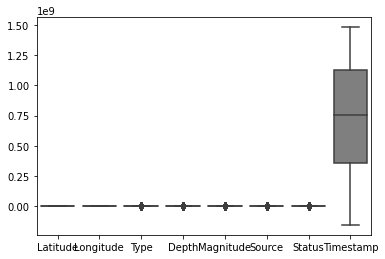

In [15]:
sns.boxplot(data=data)

<AxesSubplot:>

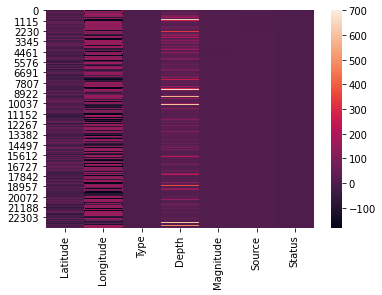

In [16]:
dropped_sepcific_col2 = []
#dropped_sepcific_col2.append('Date')
dropped_sepcific_col2.append('Timestamp')
data2 = data.drop(dropped_sepcific_col2, axis=1)
sns.heatmap(data2)

In [17]:
x = data[["Latitude", "Longitude", "Timestamp", "Source", "Status", "Type"]]
y= data[["Magnitude", "Depth"]]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

NameError: name 'train_test_split' is not defined

On utilise ici un algorithme random forest regressor car c'est un algorithme qui est efficaces sur de la regression pour prédire des valeurs numérique et il est plutôt fiable.
Comme l'amplitude et la profondeur sont liées je les met pour les résultats de la prédiction et cela me permet d'avoir un bon score sur mon algorithme. Le model est légèrement underfitting, j'ai rajouté la date que j'ai convertit en timestamp pour essayer de l'augmenter un peu.


In [18]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

NameError: name 'X_train' is not defined

In [19]:
import joblib
joblib.dump((model), 'model.joblib')

['model.joblib']